# Curve Similarity Analysis
- **Created by: Andrés Segura Tinoco**
- **Created on: May 12, 2020**
- **Data: Covid 19**

**Packages Installation**
``` console
conda config --set pip_interop_enabled True
pip install similaritymeasures
```

## 1. Read C19 data by country

In [1]:
# # Import libraries
import pandas as pd
import numpy as np
import math
import similaritymeasures
from collections import Counter

In [2]:
# Load visualization libraries
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [3]:
# Reading data from CSV file
dataURL = "../data/country_data_by_days.csv"
raw_data = pd.read_csv(dataURL)

In [4]:
# Show first 10 rows of header dataframe
raw_data.head(10)

,country,region,1,2,3,4,5,6,7,8,...,112,113,114,115,116,117,118,119,120,121
0,USA,Americas,15,15,15,15,15,15,35,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Spain,Europe,2,2,2,2,2,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Italy,Europe,3,3,3,3,3,4,21,79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,France,Europe,12,12,12,12,12,12,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Germany,Europe,16,16,16,16,16,16,16,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Turkey,Asia,1,1,1,5,6,18,47,98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,UK,Europe,9,9,9,9,9,9,9,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Brazil,Americas,1,1,1,1,2,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Iran,Asia,2,5,18,29,43,61,95,139,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,China,Asia,571,830,1287,1975,2744,4515,5974,7711,...,82926.0,82929.0,82933.0,82941.0,82947.0,82954.0,82960.0,82965.0,82967.0,82967.0


## 2. Calculate the Similarity between Countries

In [5]:
# Control variables
cnt = Counter()
top_country = 10
n_days = 77
n_methods = 6

# Analysis variables
exp_country = 'Colombia'
exp_data = np.zeros((n_days, 2))
countries_data = dict()
countries_region = dict()

In [6]:
# Split data between expected and reality datasets
for ix, row in raw_data.iterrows():
    country_name = row["country"]
    countries_region[country_name] = row["region"]
    y = []
    
    for i in range(1, n_days + 1):
            if pd.notna(row[str(i)]):
                y.append(int(row[str(i)]))
            else:
                break
    
    if country_name == exp_country:    
        exp_data[:, 0] = np.arange(n_days)
        exp_data[:, 1] = y
    else:
        if len(y) == n_days:
            temp_data = np.zeros((n_days, 2))
            temp_data[:, 0] = np.arange(n_days)
            temp_data[:, 1] = y
            countries_data[country_name] = temp_data

### 2.1. Mean Absolute Error

In [7]:
mae_result = dict()
for country, num_data in countries_data.items():
    mae = 0
    for ix in range(0, n_days):
        mae += abs(exp_data[ix, 1] - num_data[ix, 1])
    mae_result[country] = mae / n_days

In [8]:
# Get and save top N
output = sorted(mae_result, key=mae_result.get, reverse=False)[:top_country]
for country in output:
    cnt[country] += 1
    print('%s: %s' % (country, mae_result[country]))

South Africa: 647.6883116883117
Indonesia: 707.1818181818181
Romania: 983.9090909090909
Ukraine: 1008.8831168831168
Dominican Republic: 1078.844155844156
Sweden: 1391.7792207792209
Serbia: 1404.6883116883116
Denmark: 1449.2597402597403
Singapore: 1858.7792207792209
Czechia: 1969.4025974025974


### 2.2. Partial Curve Mapping

In [9]:
# Quantify the difference between the two curves using PCM
pcm_result = dict()
for country, num_data in countries_data.items():
    pcm = similaritymeasures.pcm(exp_data, num_data)
    pcm_result[country] = pcm

In [10]:
# Get and save top N
output = sorted(pcm_result, key=pcm_result.get, reverse=False)[:top_country]
for country in output:
    cnt[country] += 1
    print('%s: %s' % (country, pcm_result[country]))

South Africa: 0.8186784979866906
Indonesia: 0.9853898015256882
Ukraine: 1.4119085330947279
Romania: 1.8097508702195735
Singapore: 2.543875306424012
Sweden: 3.1645541079715067
Israel: 3.643044163158427
Poland: 3.7062312431068087
Dominican Republic: 3.888911026933277
UAE: 4.514821798634169


### 2.3. Discrete Frechet distance

In [11]:
### Quantify the difference between the two curves using Discrete Frechet distance
df_result = dict()
for country, num_data in countries_data.items():
    df = similaritymeasures.frechet_dist(exp_data, num_data)
    df_result[country] = df

In [12]:
# Get and save top N
output = sorted(df_result, key=df_result.get, reverse=False)[:top_country]
for country in output:
    cnt[country] += 1
    print('%s: %s' % (country, df_result[country]))

Indonesia: 289.0
South Africa: 576.0034722117567
Singapore: 697.0351497593217
Ukraine: 929.0
Israel: 1306.000382848336
Poland: 1581.0
Austria: 1805.000277008289
Romania: 1909.0002619172162
Sweden: 3833.0
UAE: 4649.0001075500095


### 2.4. Area between two Curves

In [13]:
# Quantify the difference between the two curves using Area between two Curves
area_result = dict()
for country, num_data in countries_data.items():
    area = similaritymeasures.area_between_two_curves(exp_data, num_data)
    area_result[country] = area

In [14]:
# Get and save top N
output = sorted(area_result, key=area_result.get, reverse=False)[:top_country]
for country in output:
    cnt[country] += 1
    print('%s: %s' % (country, area_result[country]))

South Africa: 49714.0
Indonesia: 54356.0
Romania: 74803.5
Ukraine: 77218.5
Dominican Republic: 80281.5
Serbia: 104776.5
Sweden: 105249.5
Denmark: 108083.0
Singapore: 142797.5
Czechia: 147027.0


### 2.5. Curve Length Similarity

In [15]:
# Quantify the difference between the two curves using Curve Length based similarity measure
cl_result = dict()
for country, num_data in countries_data.items():
    cl = similaritymeasures.curve_length_measure(exp_data, num_data)
    cl_result[country] = cl

In [16]:
# Get and save top N
output = sorted(cl_result, key=cl_result.get, reverse=False)[:top_country]
for country in output:
    cnt[country] += 1
    print('%s: %s' % (country, cl_result[country]))

South Africa: 0.6654789521213399
Indonesia: 0.7737439750256592
Ukraine: 1.0469235862944903
Romania: 1.2840247403437812
Israel: 1.829639822979985
Sweden: 2.229449275244321
Singapore: 2.3491381674721037
Poland: 2.6411096082422794
Dominican Republic: 2.9200075160520766
Serbia: 3.051036964557762


### 2.6. Dynamic Time Warping distance

In [17]:
# Quantify the difference between the two curves using Dynamic Time Warping distance
dtw_result = dict()
for country, num_data in countries_data.items():
    dtw, d = similaritymeasures.dtw(exp_data, num_data)
    dtw_result[country] = dtw

In [18]:
# Get and save top N
output = sorted(dtw_result, key=dtw_result.get, reverse=False)[:top_country]
for country in output:
    cnt[country] += 1
    print('%s: %s' % (country, dtw_result[country]))

Indonesia: 6161.722024381069
South Africa: 6735.74569003235
Ukraine: 8279.801098956446
Singapore: 10840.215464953333
Poland: 12120.963945302026
Romania: 12311.298357825443
Israel: 12934.049648585897
Austria: 17860.115159003723
Sweden: 21175.858586285478
UAE: 28952.108138934032


## 3. Plot Similarity Results

In [19]:
cnt.most_common()

[('South Africa', 6),
 ('Indonesia', 6),
 ('Romania', 6),
 ('Ukraine', 6),
 ('Sweden', 6),
 ('Singapore', 6),
 ('Dominican Republic', 4),
 ('Israel', 4),
 ('Poland', 4),
 ('Serbia', 3),
 ('UAE', 3),
 ('Denmark', 2),
 ('Czechia', 2),
 ('Austria', 2)]

In [20]:
# Palette of colores
palette = {"Africa": "#FF7F0E", "Americas": "#D62728", "Asia": "#2CA02C", "Europe": "#1F77B4", "Oceania": "#9467BD"}
bars = []
values= []

for row in cnt.most_common():
    bars.append(row[0])
    values.append(row[1])

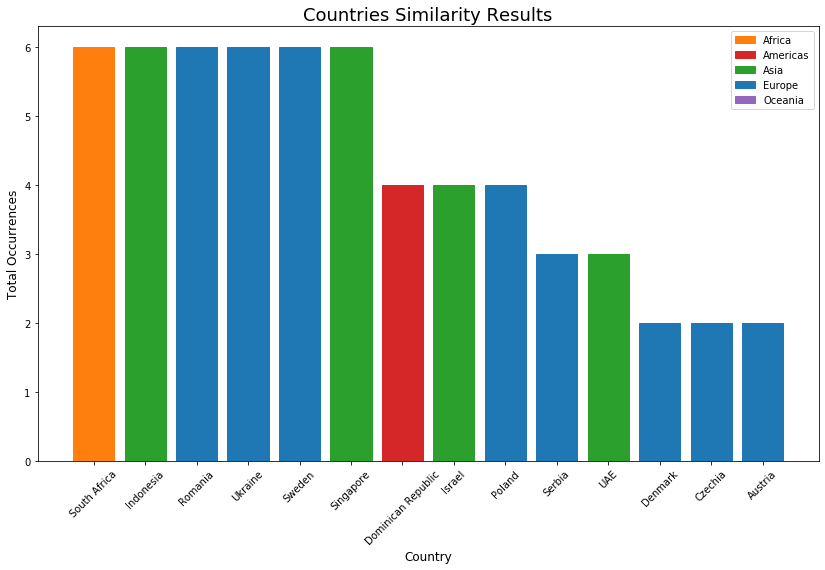

In [21]:
# Plot similarity results
plt.figure(figsize = (14, 8))

barlist = plt.bar(bars, values)
for i, v in enumerate(bars):
    barlist[i].set_color(palette[countries_region[v]])

# Add custom legend
legend_list = []
for k, v in palette.items():
    legend_list.append(mpatches.Patch(color = v, label = k))

# Plot setup
plt.xticks(rotation=45)
plt.title("Countries Similarity Results", fontsize = 18)
plt.xlabel("Country", fontsize = 12)
plt.ylabel("Total Occurrences", fontsize = 12)
plt.legend(handles = legend_list, loc = "best")
plt.show()

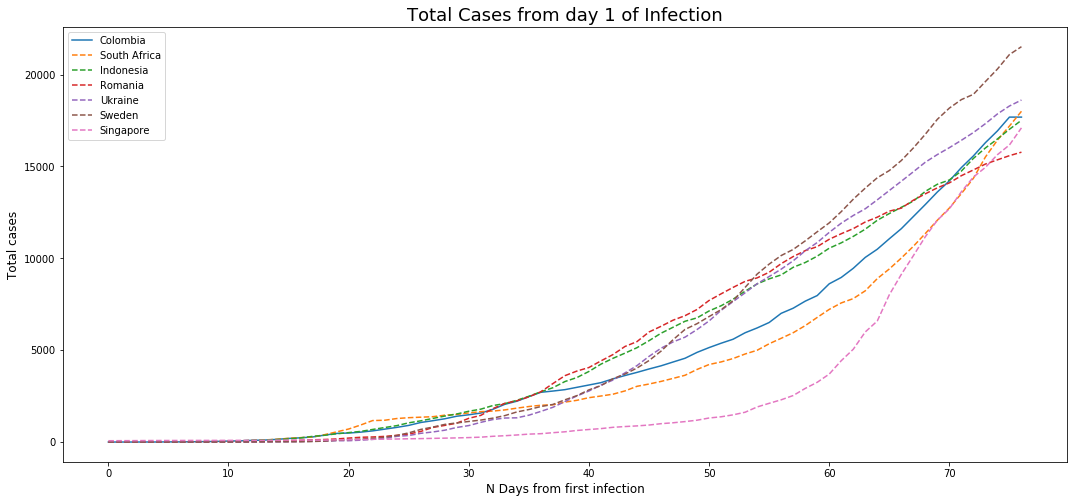

In [22]:
# Plot trends more similar to Colombia
country_list = ['Colombia']

plt.figure(figsize = (18, 8))
plt.plot(exp_data[:, 0], exp_data[:, 1])

for country in cnt:
    if cnt[country] == n_methods:
        country_list.append(country)
        num_data = countries_data[country]
        plt.plot(num_data[:, 0], num_data[:, 1], linestyle='--')

# Plot setup
plt.title("Total Cases from day 1 of Infection", fontsize = 18)
plt.xlabel("N Days from first infection", fontsize = 12)
plt.ylabel("Total cases", fontsize = 12)
plt.legend(country_list, loc = "best")
plt.show()

## References

Jekel, C. F., Venter, G., Venter, M. P., Stander, N., & Haftka, R. T. (2018). Similarity measures for identifying material parameters from hysteresis loops using inverse analysis. International Journal of Material Forming. https://doi.org/10.1007/s12289-018-1421-8

<hr>
<p><a href="https://github.com/ansegura7/WebScraping_Covid19">« Home</a></p>